In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
print("loading data set")
df = pd.read_csv('./netflix_titles.csv')
df.head() # by default head method display first 5 records.

loading data set


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning

In [4]:
print("List all columns present in the data set:")
columns = df.columns.tolist()

# Creating a DataFrame with one column containing the list of columns
columns_df = pd.DataFrame(columns, columns=["Columns"])

# Displaying the DataFrame
print(columns_df)

print("")
print("Lets check the overview information present in the data set:")
print("")
df.info()
df.shape[0]

List all columns present in the data set:
         Columns
0        show_id
1           type
2          title
3       director
4           cast
5        country
6     date_added
7   release_year
8         rating
9       duration
10     listed_in
11   description

Lets check the overview information present in the data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   88

8807

Some columns, like **"director,"** have missing data (6173 out of 8807). When analyzing, options include:

- **Dropping missing data**
- **Imputing values**
- **Leveraging domain knowledge**
- **Treating missing values as a separate category**

Understanding data impact is crucial for deciding the best approach.


# Data Transformation
country column has multiple coutries seperated by comma(,) lets split it and store in seperate rows
As we will be analysing Movies and TV shows produced by each country.

In [5]:
df['country'] = df['country'].str.split(', ')
df = df.explode('country').reset_index(drop=True)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Aggregation & Visualization.

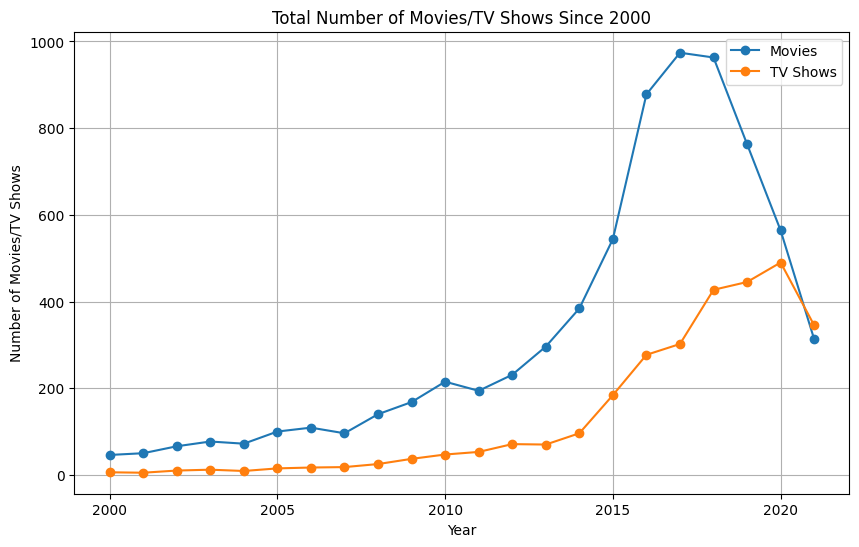

In [6]:
# Convert release_year column to datetime
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

# Filter data for release years since 2000
df_since_2000 = df[df['release_year'].dt.year >= 2000]

# Filter movies and TV shows separately
movies_data = df_since_2000[df_since_2000['type'] == 'Movie']
tv_shows_data = df_since_2000[df_since_2000['type'] == 'TV Show']

# Group by release year and count the number of movies/shows
movies_count = movies_data.groupby(movies_data['release_year'].dt.year).size()
tv_shows_count = tv_shows_data.groupby(tv_shows_data['release_year'].dt.year).size()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(movies_count.index, movies_count.values, marker='o', linestyle='-', label='Movies')
plt.plot(tv_shows_count.index, tv_shows_count.values, marker='o', linestyle='-', label='TV Shows')
plt.title('Total Number of Movies/TV Shows Since 2000')
plt.xlabel('Year')
plt.ylabel('Number of Movies/TV Shows')
plt.grid(True)
plt.legend()
plt.savefig('images/movies_tv_shows_since_2000_line_graph.png')
plt.show()


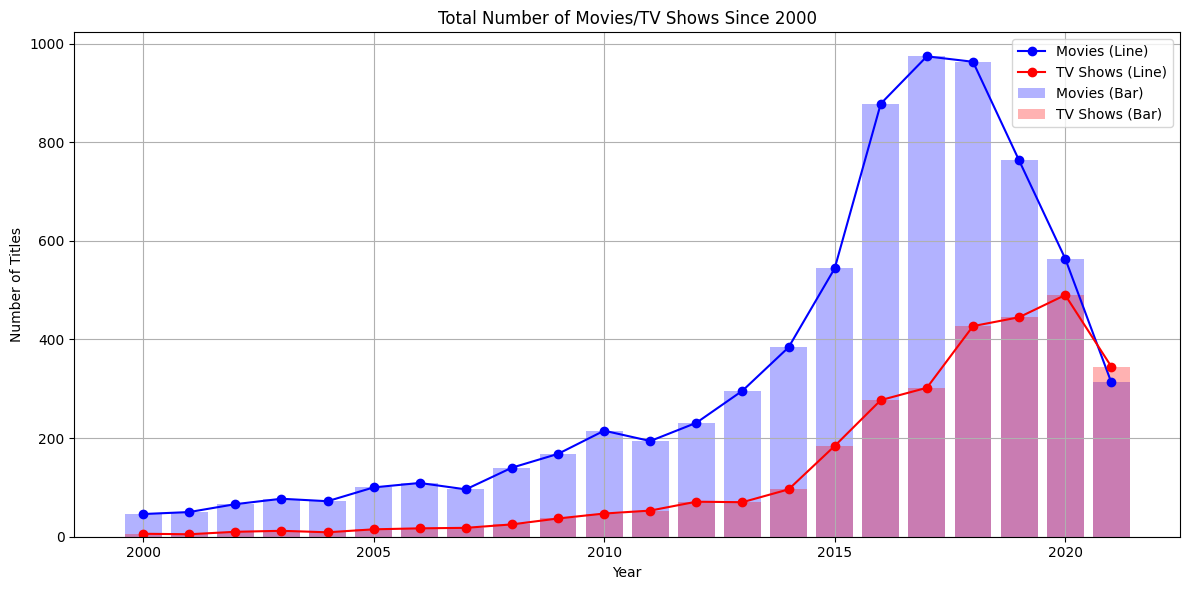

In [7]:
# Convert release_year column to datetime
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

# Filter data for release years since 2000
df_since_2000 = df[df['release_year'].dt.year >= 2000]

# Filter movies and TV shows separately
movies_data = df_since_2000[df_since_2000['type'] == 'Movie']
tv_shows_data = df_since_2000[df_since_2000['type'] == 'TV Show']

# Group by release year and count the number of movies/shows
movies_count = movies_data.groupby(movies_data['release_year'].dt.year).size()
tv_shows_count = tv_shows_data.groupby(tv_shows_data['release_year'].dt.year).size()

# Plot the data
plt.figure(figsize=(12, 6))

# Line plot
plt.plot(movies_count.index, movies_count.values, marker='o', linestyle='-', color='b', label='Movies')
plt.plot(tv_shows_count.index, tv_shows_count.values, marker='o', linestyle='-', color='r', label='TV Shows')

# Bar plot
plt.bar(movies_count.index, movies_count.values, color='b', alpha=0.3)
plt.bar(tv_shows_count.index, tv_shows_count.values, color='r', alpha=0.3)

plt.title('Total Number of Movies/TV Shows Since 2000')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(['Movies (Line)', 'TV Shows (Line)', 'Movies (Bar)', 'TV Shows (Bar)'])

plt.tight_layout()
plt.savefig('images/movies_tv_shows_since_2000_line_bar_graph.png')
plt.show()


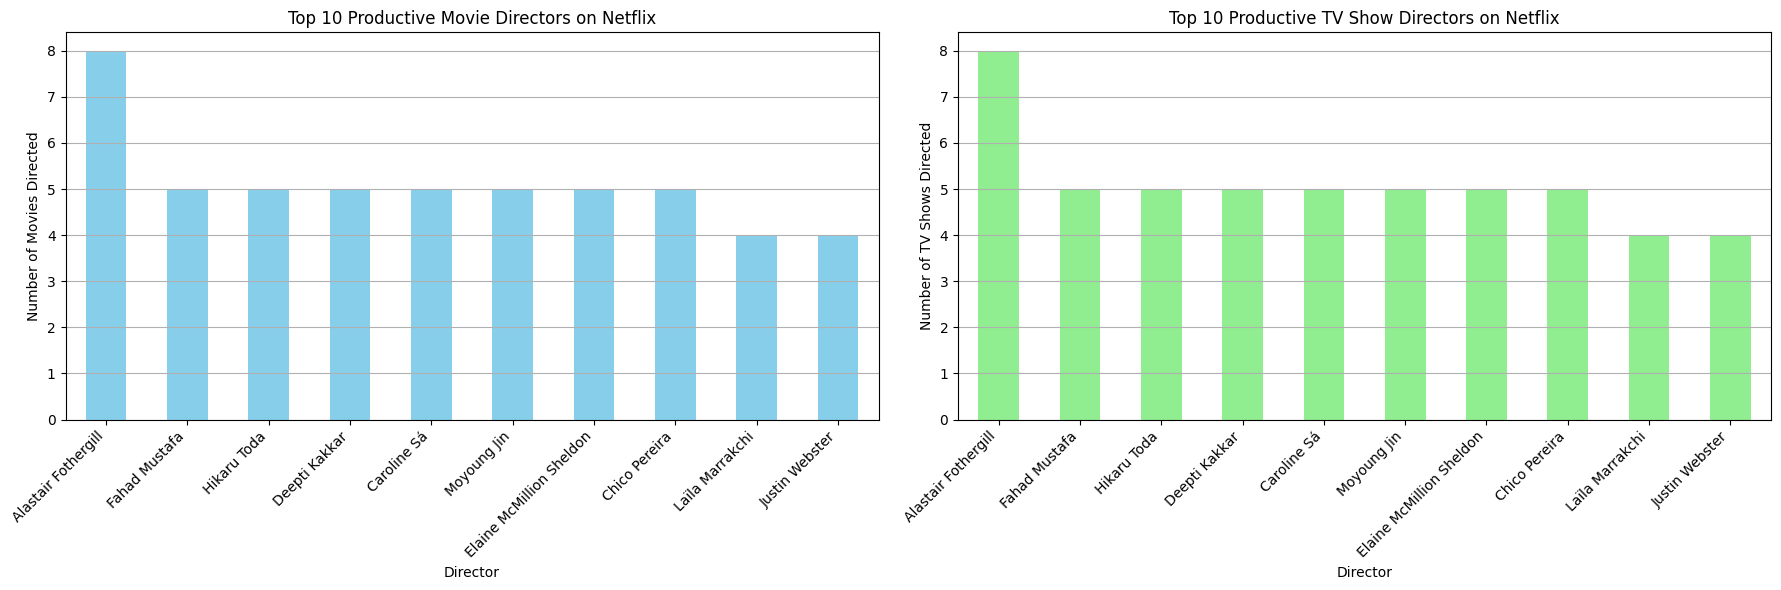

In [8]:

# Filter for directors who are not missing and explode the entries for multiple directors
directors_df = df[df['director'].notna()].assign(director=df['director'].str.split(', ')).explode('director')

# Separate movies and TV shows
movies_directors_df = directors_df[directors_df['type'] == 'Movie']
tv_shows_directors_df = directors_df[directors_df['type'] == 'TV Show']

# Count the number of movies/shows directed by each director
movies_director_productivity = movies_directors_df['director'].value_counts()
tv_shows_director_productivity = tv_shows_directors_df['director'].value_counts()

# Select the top 10 productive directors for movies and TV shows
top_10_movies_directors = movies_director_productivity.head(10)
top_10_tv_shows_directors = tv_shows_director_productivity.head(10)

# Plot the data
plt.figure(figsize=(18, 6))

# Bar plot for movies
plt.subplot(1, 2, 1)
top_10_tv_shows_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Productive Movie Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Bar plot for TV shows
plt.subplot(1, 2, 2)
top_10_tv_shows_directors.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Productive TV Show Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows Directed')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('images/top_directors.png')
plt.show()


In [9]:
import geopandas as gpd
import folium

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Correct the country names in your data to match the world map data
country_name_corrections = {
    'United States': 'United States of America',
    'United Kingdom': 'United Kingdom',
    'South Korea': 'Korea, South',
}

# Correct country names in the DataFrame
df['country'] = df['country'].replace(country_name_corrections)

# Count the number of movies/shows produced by each country
country_counts = df['country'].value_counts()

# Filter out countries that produced more than 50 movies/shows
top_countries = country_counts[country_counts > 50]

# Create a DataFrame containing only the top countries and their counts
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'count']

# Merge world map data with country counts
world_merged = world.merge(top_countries_df, how='left', left_on='name', right_on='country')

# Initialize a folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add circle markers for each country
for idx, row in world_merged.iterrows():
    if not pd.isna(row['count']):
        folium.CircleMarker(location=[row.geometry.centroid.y, row.geometry.centroid.x],
                            radius=row['count'] / 100,  # Adjust the radius for better visibility
                            color='blue',
                            fill=True,
                            fill_color='blue',
                            fill_opacity=0.7,
                            popup=f"{row['country']}: {row['count']} movies/shows").add_to(m)

# Display the map
m.fit_bounds
m.save("world_map.html")
m


/var/folders/cs/k51g_cy11353gjknd7b2c1hh0000gn/T/ipykernel_21568/985697753.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
